#### Sharp Ratio is defined as stock gain normalized with stock volatility. People could use sharp ratio to select stocks have high gains and low volatility.

#### The project tries to address whether sharp ratio calculated from 6 years of stock data can be used to predict stock performance in the following 5 years based on the sharp ratio. 

#### 18 stocks were selected from Nasdaq 100 index and analyzed in this sproject over 11 year period of time (2007-01-01 to 2017-12-31). 

In [114]:
import pandas as pd

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

In [116]:
#qqq19 contains first 19 stocks (based on alphabetic order) 
qqq19 = ["ATVI", "ADBE", "ALXN", "ALGN", "GOOGL", "GOOG", "AMZN", "AAL", "AMGN", "ADI", 
       "AMAT", "ADSK", "ADP", "BIDU", "BIIB", "BMRN", "AVGO", "CA", "AAPL"]
qqq19_wiki = []

for i in qqq19:
    a = "WIKI/"+i
    qqq19_wiki.append(a)
qqq19_wiki

['WIKI/ATVI',
 'WIKI/ADBE',
 'WIKI/ALXN',
 'WIKI/ALGN',
 'WIKI/GOOGL',
 'WIKI/GOOG',
 'WIKI/AMZN',
 'WIKI/AAL',
 'WIKI/AMGN',
 'WIKI/ADI',
 'WIKI/AMAT',
 'WIKI/ADSK',
 'WIKI/ADP',
 'WIKI/BIDU',
 'WIKI/BIIB',
 'WIKI/BMRN',
 'WIKI/AVGO',
 'WIKI/CA',
 'WIKI/AAPL']

#### 'WIKI/ATVI' is the format used by quandl to get ATVI stock data.  

In [118]:
# need to input API key below to run the code.  I have removed my API key.  
# Use the for loop to get all the stock data from Quandl.  
dd ={}
for i in qqq19_wiki:
    dd[i] = quandl.get(i, start_date='2007-01-01',end_date='2018-01-01', api_key='Put your API key')

In [119]:
dd.keys()

dict_keys(['WIKI/ATVI', 'WIKI/ADBE', 'WIKI/ALXN', 'WIKI/ALGN', 'WIKI/GOOGL', 'WIKI/GOOG', 'WIKI/AMZN', 'WIKI/AAL', 'WIKI/AMGN', 'WIKI/ADI', 'WIKI/AMAT', 'WIKI/ADSK', 'WIKI/ADP', 'WIKI/BIDU', 'WIKI/BIIB', 'WIKI/BMRN', 'WIKI/AVGO', 'WIKI/CA', 'WIKI/AAPL'])

In [120]:
nam = []
for i in qqq19:
    nam.append(i.lower())
nam

['atvi',
 'adbe',
 'alxn',
 'algn',
 'googl',
 'goog',
 'amzn',
 'aal',
 'amgn',
 'adi',
 'amat',
 'adsk',
 'adp',
 'bidu',
 'biib',
 'bmrn',
 'avgo',
 'ca',
 'aapl']

In [121]:
for i in range(19):
    dd[qqq19_wiki[i]].to_csv(nam[i]+'.csv')

#### Save data as csv files, don't need to import data from Quandl every time running the following code after saving the data.    

In [122]:
# read the data directly from saved csv files.   
dic ={}
for i in range(19):
    dic[nam[i]] = pd.read_csv(nam[i]+'.csv', index_col='Date')    

In [123]:
# dic[nam[0]]['Close'] contains closing price data of atvi.  To setup the first data column in the dataframe for the following concatenation.   
data18 = dic[nam[0]]['Close']
data18.tail()

Date
2017-12-22    64.51
2017-12-26    63.45
2017-12-27    63.34
2017-12-28    63.40
2017-12-29    63.32
Name: Close, dtype: float64

In [124]:
# concatenate the closing stock price data for all 19 stocks.
for i in range(1,19):
    data18 = pd.concat([data18, dic[nam[i]]['Close']], axis=1)

In [125]:
# change column names to corresponding stock ticker symbols.  
data18.columns = [ 
 'atvi',
 'adbe',
 'alxn',
 'algn',
 'googl',
 'goog',
 'amzn',
 'aal',
 'amgn',
 'adi',
 'amat',
 'adsk',
 'adp',
 'bidu',
 'biib',
 'bmrn',
 'avgo',
 'ca', 'aapl']

In [126]:
data18.head()

,atvi,adbe,alxn,algn,googl,goog,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007-01-03,17.16,39.92,40.61,13.35,467.59,NaN,38.70,56.30,68.40,32.84,18.42,40.56,48.41,122.41,49.33,16.10,NaN,23.32,83.80
2007-01-04,17.30,40.82,40.73,13.60,483.26,NaN,38.90,58.84,71.33,33.41,18.80,41.33,48.90,126.00,49.75,16.55,NaN,24.11,85.66
2007-01-05,17.20,40.62,40.46,13.64,487.19,NaN,38.37,58.29,71.50,33.03,18.67,41.93,48.76,122.50,49.76,16.51,NaN,24.04,85.05
2007-01-08,17.19,40.45,39.35,13.68,483.58,NaN,37.50,57.93,70.93,33.29,18.89,41.80,48.79,121.95,50.02,16.47,NaN,24.39,85.47
2007-01-09,17.18,39.63,39.05,13.70,485.50,NaN,37.78,57.90,71.27,33.24,19.25,42.32,48.60,123.72,49.50,16.63,NaN,24.86,92.57


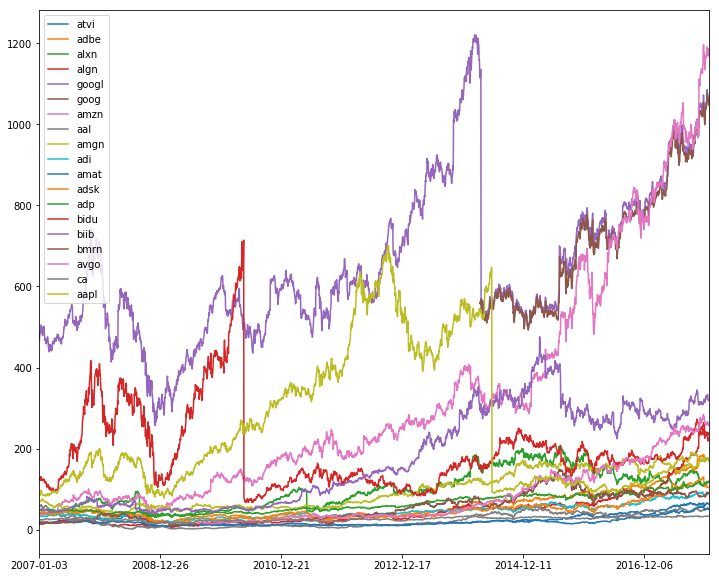

In [127]:
data18.plot(figsize=(12, 10))
# The plot shows GOOGL, AAPL and BIDU containing sharp drops of stock prices, likely due to stock splits. The stock prices need to be split-adjusted. 

In [128]:
# 1 GOOGL stock becomes 1 GOOGL plus GOOG on '2014-03-27', distributed on '2014-04-03'

data18[data18.index > '2014-03-31'].head(5)

,atvi,adbe,alxn,algn,googl,goog,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2014-04-01,20.690,65.93,155.345,53.590,1134.89,567.16,342.99,37.94,126.07,54.08,20.62,50.07,77.50,159.18,309.7900,68.61,65.05,31.59,541.65
2014-04-02,20.775,65.48,154.510,54.240,1135.10,567.00,341.96,37.71,125.98,54.06,20.79,49.58,77.67,160.47,309.7000,68.19,64.64,31.84,542.55
2014-04-03,20.240,62.45,151.460,53.590,571.50,569.74,333.62,37.34,124.13,53.98,20.84,48.31,77.37,157.45,301.8600,66.03,63.93,31.67,538.79
2014-04-04,20.120,61.32,142.500,54.810,545.25,543.14,323.00,36.56,119.11,52.92,20.25,47.32,75.82,149.35,288.2699,63.34,61.80,31.08,531.82
2014-04-07,19.429,60.47,145.660,52.938,540.63,538.15,317.76,35.78,118.82,53.12,20.03,46.59,75.27,143.51,294.1900,63.19,60.36,31.26,523.47


In [129]:
# Need to adjust googl price prior to '2014-04-03'. Compare googl price on '2014-04-02' and '2014-04-03'(see above) 

In [130]:
# Try to adjust the price outside the whole dataframe. So if something goes wrong, it would not affect the whole dataframe (especially for the first time). 
googl = data18['googl']
googl.head()

2007-01-03    467.59
2007-01-04    483.26
2007-01-05    487.19
2007-01-08    483.58
2007-01-09    485.50
Name: googl, dtype: float64

In [131]:
googl[googl.index < '2014-04-03'] = googl[googl.index < '2014-04-03'] / 2

In [132]:
googl[googl.index < '2014-04-03'].tail()
# The split adjustment seems to be correct.

2014-03-27    557.140
2014-03-28    560.075
2014-03-31    557.255
2014-04-01    567.445
2014-04-02    567.550
Name: googl, dtype: float64

In [133]:
# assign the adjustment into the whole dataframe
data18.loc[(data18.index < '2014-04-03'),'googl'] = googl[googl.index < '2014-04-03']

In [134]:
data18[data18.index < '2014-04-08']['googl'].tail()
# data prior to '2014-04-03' got adjusted.  

2014-04-01    567.445
2014-04-02    567.550
2014-04-03    571.500
2014-04-04    545.250
2014-04-07    540.630
Name: googl, dtype: float64

In [135]:
# 'goog' price more less mirrors 'googl' price. The column will be dropped. I will end up analyzing 18 stocks.  
data18.drop('goog', inplace=True, axis=1)

In [136]:
data18.head(2)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007-01-03,17.16,39.92,40.61,13.35,233.795,38.7,56.30,68.40,32.84,18.42,40.56,48.41,122.41,49.33,16.10,NaN,23.32,83.80
2007-01-04,17.30,40.82,40.73,13.60,241.630,38.9,58.84,71.33,33.41,18.80,41.33,48.90,126.00,49.75,16.55,NaN,24.11,85.66


In [137]:
aapl = data18['aapl']

In [138]:
# 2014-06-06 was the last trading day before 1-to-7 split
aapl[aapl.index < '2014-06-07'] = aapl[aapl.index < '2014-06-07'] / 7

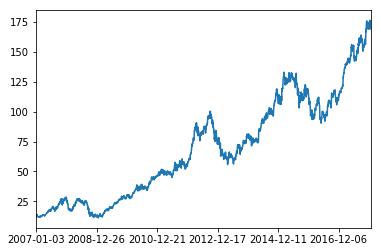

In [139]:
aapl.plot()
# appl prices are split-adjusted.

In [140]:
# Assign the split into the dataframe data18
data18.loc[(data18.index < '2014-06-07'),'aapl'] = aapl[aapl.index < '2014-06-07']

In [141]:
data18.head(2)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007-01-03,17.16,39.92,40.61,13.35,233.795,38.7,56.30,68.40,32.84,18.42,40.56,48.41,122.41,49.33,16.10,NaN,23.32,11.971429
2007-01-04,17.30,40.82,40.73,13.60,241.630,38.9,58.84,71.33,33.41,18.80,41.33,48.90,126.00,49.75,16.55,NaN,24.11,12.237143


In [142]:
data18['aapl'] = data18['aapl'].round(2)  

In [143]:
data18.head(2)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007-01-03,17.16,39.92,40.61,13.35,233.795,38.7,56.30,68.40,32.84,18.42,40.56,48.41,122.41,49.33,16.10,NaN,23.32,11.97
2007-01-04,17.30,40.82,40.73,13.60,241.630,38.9,58.84,71.33,33.41,18.80,41.33,48.90,126.00,49.75,16.55,NaN,24.11,12.24


In [144]:
# BIDU had 1 to 10 stock split on 2010-05-12.  Prices prior to 2010-05-12 need to be adjusted by 1/10.
data18[data18.index > '2010-05-09' ]['bidu'].head()

2010-05-10    694.780
2010-05-11    714.170
2010-05-12     78.206
2010-05-13     75.640
2010-05-14     73.980
Name: bidu, dtype: float64

In [145]:
data18.loc[(data18.index < '2010-05-12'),'bidu'] = data18.loc[(data18.index < '2010-05-12'),'bidu'] / 10

In [146]:
data18[data18.index > '2010-05-09' ]['bidu'].head()
# The prices were adjusted.

2010-05-10    69.478
2010-05-11    71.417
2010-05-12    78.206
2010-05-13    75.640
2010-05-14    73.980
Name: bidu, dtype: float64

In [147]:
data18['bidu'] = data18['bidu'].round(2)

In [148]:
data18.head(2)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007-01-03,17.16,39.92,40.61,13.35,233.795,38.7,56.30,68.40,32.84,18.42,40.56,48.41,12.24,49.33,16.10,NaN,23.32,11.97
2007-01-04,17.30,40.82,40.73,13.60,241.630,38.9,58.84,71.33,33.41,18.80,41.33,48.90,12.60,49.75,16.55,NaN,24.11,12.24


In [150]:
data18.info()
# There are 2768 index (datetime) entries.  Some columns contain less than 2768 non-null values, suggesting missing values in the data frame 

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 2007-01-03 to 2017-12-29
Data columns (total 18 columns):
atvi     2767 non-null float64
adbe     2767 non-null float64
alxn     2768 non-null float64
algn     2768 non-null float64
googl    2768 non-null float64
amzn     2767 non-null float64
aal      2768 non-null float64
amgn     2768 non-null float64
adi      2768 non-null float64
amat     2768 non-null float64
adsk     2768 non-null float64
adp      2768 non-null float64
bidu     2767 non-null float64
biib     2768 non-null float64
bmrn     2768 non-null float64
avgo     2115 non-null float64
ca       2768 non-null float64
aapl     2767 non-null float64
dtypes: float64(18)
memory usage: 490.9+ KB


In [151]:
# check if any null values in the data set. atvi, adbe, amzn, bidu, aapl contain one missing value on '2017-08-07'
data18[data18['aapl'].isnull()]

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2017-08-07,NaN,NaN,138.33,174.01,945.75,NaN,50.58,174.58,78.87,43.95,109.82,112.18,NaN,291.01,89.05,252.44,32.315,NaN


In [152]:
data18[(data18.index) > '2017-08-03'].head(3)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2017-08-04,62.01,147.71,136.64,169.30,945.79,987.58,50.80,173.85,77.78,42.82,108.39,111.39,226.05,288.27,89.70,249.17,31.990,156.39
2017-08-07,NaN,NaN,138.33,174.01,945.75,NaN,50.58,174.58,78.87,43.95,109.82,112.18,NaN,291.01,89.05,252.44,32.315,NaN
2017-08-08,61.33,147.81,136.04,173.62,944.19,989.84,50.00,173.69,78.97,43.90,108.35,108.51,229.79,289.26,85.46,251.36,32.220,160.08


In [153]:
# From Yahoo Finance, AMZN close price was 992.27 on 2017-08-07
data18.loc[data18['aapl'].isnull(), 'amzn'] = 992.27

In [154]:
data18[(data18.index) > '2017-08-03'].head(3)
# amzn price is corrected on 2017-08-07

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2017-08-04,62.01,147.71,136.64,169.30,945.79,987.58,50.80,173.85,77.78,42.82,108.39,111.39,226.05,288.27,89.70,249.17,31.990,156.39
2017-08-07,NaN,NaN,138.33,174.01,945.75,992.27,50.58,174.58,78.87,43.95,109.82,112.18,NaN,291.01,89.05,252.44,32.315,NaN
2017-08-08,61.33,147.81,136.04,173.62,944.19,989.84,50.00,173.69,78.97,43.90,108.35,108.51,229.79,289.26,85.46,251.36,32.220,160.08


In [155]:
# more corrections for NaN values.
data18.loc[data18['aapl'].isnull(), 'atvi'] = 62.51
data18.loc[data18['aapl'].isnull(), 'adbe'] = 148.44
data18.loc[data18['aapl'].isnull(), 'bidu'] = 227.16
data18.loc[data18['aapl'].isnull(), 'aapl'] = 158.81

In [156]:
data18[(data18.index) > '2017-08-03'].head(3)

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2017-08-04,62.01,147.71,136.64,169.30,945.79,987.58,50.80,173.85,77.78,42.82,108.39,111.39,226.05,288.27,89.70,249.17,31.990,156.39
2017-08-07,62.51,148.44,138.33,174.01,945.75,992.27,50.58,174.58,78.87,43.95,109.82,112.18,227.16,291.01,89.05,252.44,32.315,158.81
2017-08-08,61.33,147.81,136.04,173.62,944.19,989.84,50.00,173.69,78.97,43.90,108.35,108.51,229.79,289.26,85.46,251.36,32.220,160.08


In [157]:
# Daily return = price of that day - price of the prvious day. The first row will be NaN, due to no data available on the previous day in the data frame. Pandas built in function pct_change(1) was used to calculate the daily return. "1" in pct_change(1) indictes 1 previous data point   
data18['atvi daily return'] = data18['atvi'].pct_change(1)

In [158]:
# atvi daily return column displays correct result
data18.head()

,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl,atvi daily return
2007-01-03,17.16,39.92,40.61,13.35,233.795,38.70,56.30,68.40,32.84,18.42,40.56,48.41,12.24,49.33,16.10,NaN,23.32,11.97,NaN
2007-01-04,17.30,40.82,40.73,13.60,241.630,38.90,58.84,71.33,33.41,18.80,41.33,48.90,12.60,49.75,16.55,NaN,24.11,12.24,0.008159
2007-01-05,17.20,40.62,40.46,13.64,243.595,38.37,58.29,71.50,33.03,18.67,41.93,48.76,12.25,49.76,16.51,NaN,24.04,12.15,-0.005780
2007-01-08,17.19,40.45,39.35,13.68,241.790,37.50,57.93,70.93,33.29,18.89,41.80,48.79,12.20,50.02,16.47,NaN,24.39,12.21,-0.000581
2007-01-09,17.18,39.63,39.05,13.70,242.750,37.78,57.90,71.27,33.24,19.25,42.32,48.60,12.37,49.50,16.63,NaN,24.86,13.22,-0.000582


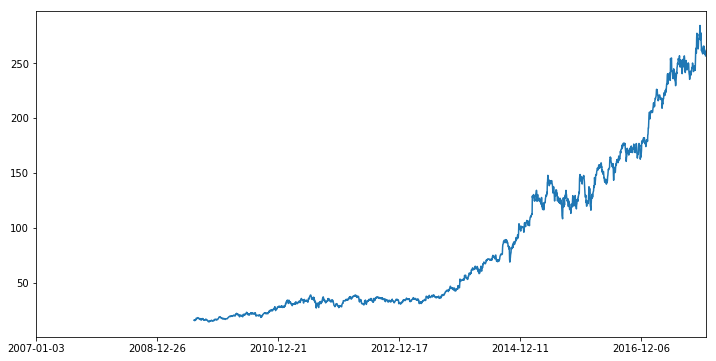

In [159]:
# avgo contains many missing values, due the stock was IPO in 2009 as shown in the plot below.
data18['avgo'].plot(figsize=(12, 6))

In [160]:
# Create a dataframe containing only the daily return data.
data_day_ret = pd.DataFrame({'A':[]})
for i in data18.columns:
    data_day_ret[i+' day_ret'] = data18[i].pct_change(1)

In [161]:
#remove 'A" from the DataFrame 
data_day_ret.drop('A', axis=1, inplace=True)

In [162]:
data_day_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 2007-01-03 to 2017-12-29
Data columns (total 19 columns):
atvi day_ret                 2767 non-null float64
adbe day_ret                 2767 non-null float64
alxn day_ret                 2767 non-null float64
algn day_ret                 2767 non-null float64
googl day_ret                2767 non-null float64
amzn day_ret                 2767 non-null float64
aal day_ret                  2767 non-null float64
amgn day_ret                 2767 non-null float64
adi day_ret                  2767 non-null float64
amat day_ret                 2767 non-null float64
adsk day_ret                 2767 non-null float64
adp day_ret                  2767 non-null float64
bidu day_ret                 2767 non-null float64
biib day_ret                 2767 non-null float64
bmrn day_ret                 2767 non-null float64
avgo day_ret                 2114 non-null float64
ca day_ret                   2767 non-null float64
aapl day_ret    

In [163]:
data_day_ret.head(3)

,atvi day_ret,adbe day_ret,alxn day_ret,algn day_ret,googl day_ret,amzn day_ret,aal day_ret,amgn day_ret,adi day_ret,amat day_ret,adsk day_ret,adp day_ret,bidu day_ret,biib day_ret,bmrn day_ret,avgo day_ret,ca day_ret,aapl day_ret,atvi daily return day_ret
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.008159,0.022545,0.002955,0.018727,0.033512,0.005168,0.045115,0.042836,0.017357,0.020630,0.018984,0.010122,0.029412,0.008514,0.027950,NaN,0.033877,0.022556,NaN
2007-01-05,-0.005780,-0.004900,-0.006629,0.002941,0.008132,-0.013625,-0.009347,0.002383,-0.011374,-0.006915,0.014517,-0.002863,-0.027778,0.000201,-0.002417,NaN,-0.002903,-0.007353,-1.708505


In [164]:
# Remove the last column 'atvi daily return day_ret' due to it was added earlier, it becomes daily change of atvi daily return. The correct atvi daily return is already in the first column as 'atvi day_ret' 
data_day_ret.drop('atvi daily return day_ret', axis=1, inplace=True)

In [165]:
data_day_ret.head(3)

,atvi day_ret,adbe day_ret,alxn day_ret,algn day_ret,googl day_ret,amzn day_ret,aal day_ret,amgn day_ret,adi day_ret,amat day_ret,adsk day_ret,adp day_ret,bidu day_ret,biib day_ret,bmrn day_ret,avgo day_ret,ca day_ret,aapl day_ret
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.008159,0.022545,0.002955,0.018727,0.033512,0.005168,0.045115,0.042836,0.017357,0.020630,0.018984,0.010122,0.029412,0.008514,0.027950,NaN,0.033877,0.022556
2007-01-05,-0.005780,-0.004900,-0.006629,0.002941,0.008132,-0.013625,-0.009347,0.002383,-0.011374,-0.006915,0.014517,-0.002863,-0.027778,0.000201,-0.002417,NaN,-0.002903,-0.007353


In [166]:
# Calculating average 2007 daily return.  The first row null values were excluded through datetime index selection

# >'2007-01-03' were used to exclude NaN values in the first row
data_day_ret[(data_day_ret.index > '2007-01-03') & (data_day_ret.index < '2008-01-01')].mean(axis=0)

atvi day_ret     0.002480
adbe day_ret     0.000389
alxn day_ret     0.002716
algn day_ret     0.001758
googl day_ret    0.001683
amzn day_ret     0.003998
aal day_ret     -0.004770
amgn day_ret    -0.001417
adi day_ret      0.000003
amat day_ret     0.000007
adsk day_ret     0.000978
adp day_ret     -0.000261
bidu day_ret     0.005272
biib day_ret     0.000910
bmrn day_ret     0.003492
avgo day_ret          NaN
ca day_ret       0.000363
aapl day_ret     0.003729
dtype: float64

In [167]:
# Sharp Ratio (SR) = mean of daily return / std of daily return 
# SR2007 is Sharp Ratio for 2007.
m2007 = data_day_ret[(data_day_ret.index > '2007-01-03') & (data_day_ret.index < '2008-01-01')].mean(axis=0)
std2007 = data_day_ret[(data_day_ret.index > '2007-01-03') & (data_day_ret.index < '2008-01-01')].std(axis=0)
SR2007 =  m2007/std2007    

In [168]:
# Annualized Sharp Ratio (ASR) of 2007. 252 is the number of trading days per year.
ASR2007 = (252**0.5)*SR2007

In [169]:
ASR2007

atvi day_ret     1.634328
adbe day_ret     0.402982
alxn day_ret     1.862646
algn day_ret     0.676492
googl day_ret    1.744452
amzn day_ret     1.931313
aal day_ret     -2.225736
amgn day_ret    -1.397471
adi day_ret      0.003225
amat day_ret     0.005898
adsk day_ret     0.865226
adp day_ret     -0.342450
bidu day_ret     2.342741
biib day_ret     0.566189
bmrn day_ret     2.102039
avgo day_ret          NaN
ca day_ret       0.423536
aapl day_ret     2.488159
dtype: float64

In [170]:
## creating a dictionary which contains annualized sharp ratio data for all years. 
ASR = {}
years = ['2007-01-03', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', 
         '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01']

for i in range(11):
    ASR[i] = (252**0.5)* data_day_ret[(data_day_ret.index > years[i]) & (data_day_ret.index < years[i+1])].mean(axis=0)/data_day_ret[(data_day_ret.index > years[i]) & (data_day_ret.index < years[i+1])].std(axis=0) 
    # 252^0.5 * sharp ratio to get annualized sharp ratio  

In [171]:
# convert the dictionary to pandas dataframe
ASR_df = pd.DataFrame(ASR)

In [172]:
# Assign column names
ASR_df.columns = ['2007 ASR', '2008 ASR', '2009 ASR', '2010 ASR', '2011 ASR', '2012 ASR', '2013 ASR', '2014 ASR',
      '2015 ASR', '2016 ASR', '2017 ASR']

In [173]:
ASR_df.reset_index()

,index,2007 ASR,2008 ASR,2009 ASR,2010 ASR,2011 ASR,2012 ASR,2013 ASR,2014 ASR,2015 ASR,2016 ASR,2017 ASR
0,atvi day_ret,1.634328,-1.017337,0.833069,0.554684,0.090241,-0.529974,1.810848,0.567044,2.486142,-0.066233,1.996807
1,adbe day_ret,0.402982,-0.968811,1.407640,-0.273990,-0.084359,1.352675,1.961656,0.881611,1.211101,0.494417,2.579785
2,alxn day_ret,1.862646,-0.558049,0.942942,2.118530,0.224022,1.052366,1.130717,1.000499,0.259723,-0.771512,0.086351
3,algn day_ret,0.676492,-0.587526,1.377513,0.427480,0.604891,0.584862,2.035071,0.080780,0.690949,1.462217,2.614367
4,googl day_ret,1.744452,-1.188769,2.472352,-0.015363,0.429747,0.515984,2.207065,-0.149497,1.466217,0.192093,1.954893
5,amzn day_ret,1.931313,-0.568908,2.088409,1.054814,0.090925,1.331135,1.851008,-0.613416,2.483548,0.497363,2.236551
6,aal day_ret,-2.225736,0.327130,0.113554,1.499903,-0.735971,2.008532,1.907990,2.148189,-0.446497,0.449356,0.523373
7,amgn day_ret,-1.397471,0.712986,0.094886,-0.021614,0.830969,1.763344,1.168615,1.480437,0.207616,-0.303220,1.078550
8,adi day_ret,0.003225,-0.822342,1.546763,0.745872,-0.020304,0.918384,1.108035,0.516688,0.145485,1.273386,1.113525
9,amat day_ret,0.005898,-0.775962,0.908484,0.171585,-0.596519,0.399120,1.895130,1.467578,-0.937125,1.911394,1.894325


In [174]:
ASR_df['stock name'] = ['atvi',
 'adbe',
 'alxn',
 'algn',
 'googl',
 'amzn',
 'aal',
 'amgn',
 'adi',
 'amat',
 'adsk',
 'adp',
 'bidu',
 'biib',
 'bmrn',
 'avgo',
 'ca',
 'aapl']

In [175]:
ASR_df.set_index('stock name', inplace=True)

In [176]:
# save the file in csv format.
ASR_df.to_csv('qqq18_ab.csv', encoding="UTF-8")

In [177]:
ASR_df

,2007 ASR,2008 ASR,2009 ASR,2010 ASR,2011 ASR,2012 ASR,2013 ASR,2014 ASR,2015 ASR,2016 ASR,2017 ASR
stock name,,,,,,,,,,,
atvi,1.634328,-1.017337,0.833069,0.554684,0.090241,-0.529974,1.810848,0.567044,2.486142,-0.066233,1.996807
adbe,0.402982,-0.968811,1.407640,-0.273990,-0.084359,1.352675,1.961656,0.881611,1.211101,0.494417,2.579785
alxn,1.862646,-0.558049,0.942942,2.118530,0.224022,1.052366,1.130717,1.000499,0.259723,-0.771512,0.086351
algn,0.676492,-0.587526,1.377513,0.427480,0.604891,0.584862,2.035071,0.080780,0.690949,1.462217,2.614367
googl,1.744452,-1.188769,2.472352,-0.015363,0.429747,0.515984,2.207065,-0.149497,1.466217,0.192093,1.954893
amzn,1.931313,-0.568908,2.088409,1.054814,0.090925,1.331135,1.851008,-0.613416,2.483548,0.497363,2.236551
aal,-2.225736,0.327130,0.113554,1.499903,-0.735971,2.008532,1.907990,2.148189,-0.446497,0.449356,0.523373
amgn,-1.397471,0.712986,0.094886,-0.021614,0.830969,1.763344,1.168615,1.480437,0.207616,-0.303220,1.078550
adi,0.003225,-0.822342,1.546763,0.745872,-0.020304,0.918384,1.108035,0.516688,0.145485,1.273386,1.113525


In [178]:
ASR_df['ASR mean'] = ASR_df.mean(axis=1)

In [179]:
ASR_df['ASR std'] = ASR_df.std(axis=1)

In [180]:
ASR_df

,2007 ASR,2008 ASR,2009 ASR,2010 ASR,2011 ASR,2012 ASR,2013 ASR,2014 ASR,2015 ASR,2016 ASR,2017 ASR,ASR mean,ASR std
stock name,,,,,,,,,,,,,
atvi,1.634328,-1.017337,0.833069,0.554684,0.090241,-0.529974,1.810848,0.567044,2.486142,-0.066233,1.996807,0.759965,1.062455
adbe,0.402982,-0.968811,1.407640,-0.273990,-0.084359,1.352675,1.961656,0.881611,1.211101,0.494417,2.579785,0.814973,0.985356
alxn,1.862646,-0.558049,0.942942,2.118530,0.224022,1.052366,1.130717,1.000499,0.259723,-0.771512,0.086351,0.668021,0.871609
algn,0.676492,-0.587526,1.377513,0.427480,0.604891,0.584862,2.035071,0.080780,0.690949,1.462217,2.614367,0.906100,0.861200
googl,1.744452,-1.188769,2.472352,-0.015363,0.429747,0.515984,2.207065,-0.149497,1.466217,0.192093,1.954893,0.875380,1.107518
amzn,1.931313,-0.568908,2.088409,1.054814,0.090925,1.331135,1.851008,-0.613416,2.483548,0.497363,2.236551,1.125704,1.069777
aal,-2.225736,0.327130,0.113554,1.499903,-0.735971,2.008532,1.907990,2.148189,-0.446497,0.449356,0.523373,0.506348,1.279540
amgn,-1.397471,0.712986,0.094886,-0.021614,0.830969,1.763344,1.168615,1.480437,0.207616,-0.303220,1.078550,0.510463,0.866550
adi,0.003225,-0.822342,1.546763,0.745872,-0.020304,0.918384,1.108035,0.516688,0.145485,1.273386,1.113525,0.593520,0.672262


In [181]:
ASR_df2 = ASR_df.transpose()

In [182]:
ASR_df2.to_csv('qqq18_ab_tran.csv', encoding="UTF-8")

In [183]:
ASR_df2

stock name,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
2007 ASR,1.634328,0.402982,1.862646,0.676492,1.744452,1.931313,-2.225736,-1.397471,0.003225,0.005898,0.865226,-0.342450,2.342741,0.566189,2.102039,NaN,0.423536,2.488159
2008 ASR,-1.017337,-0.968811,-0.558049,-0.587526,-1.188769,-0.568908,0.327130,0.712986,-0.822342,-0.775962,-1.181393,-0.118226,-0.793251,-0.036554,-0.731306,NaN,-0.295315,-1.146843
2009 ASR,0.833069,1.407640,0.942942,1.377513,2.472352,2.088409,0.113554,0.094886,1.546763,0.908484,0.774091,0.457201,2.582571,0.523876,0.395679,1.068910,0.719057,2.837835
2010 ASR,0.554684,-0.273990,2.118530,0.427480,-0.015363,1.054814,1.499903,-0.021614,0.745872,0.171585,1.322568,0.538199,2.064740,1.015731,1.322661,1.410153,0.474443,1.725531
2011 ASR,0.090241,-0.084359,0.224022,0.604891,0.429747,0.090925,-0.735971,0.830969,-0.020304,-0.596519,-0.280693,0.807284,0.631278,1.624464,0.892036,0.254495,-0.505589,0.998085
2012 ASR,-0.529974,1.352675,1.052366,0.584862,0.515984,1.331135,2.008532,1.763344,0.918384,0.399120,0.605221,0.446000,-0.217214,1.565915,1.041805,0.442489,0.480932,1.078387
2013 ASR,1.810848,1.961656,1.130717,2.035071,2.207065,1.851008,1.907990,1.168615,1.108035,1.895130,1.433261,2.558547,1.716704,2.127252,1.229087,1.855904,2.629101,0.329823
2014 ASR,0.567044,0.881611,1.000499,0.080780,-0.149497,-0.613416,2.148189,1.480437,0.516688,1.467578,0.799024,0.260889,0.868631,0.718204,0.861104,2.179938,-0.449605,1.585190
2015 ASR,2.486142,1.211101,0.259723,0.690949,1.466217,2.483548,-0.446497,0.207616,0.145485,-0.937125,0.191138,0.179400,-0.279499,-0.035049,0.559902,1.101854,-0.200077,-0.044655
2016 ASR,-0.066233,0.494417,-0.771512,1.462217,0.192093,0.497363,0.449356,-0.303220,1.273386,1.911394,0.728124,1.228114,-0.241646,-0.044304,-0.284773,0.811220,0.618854,0.525776


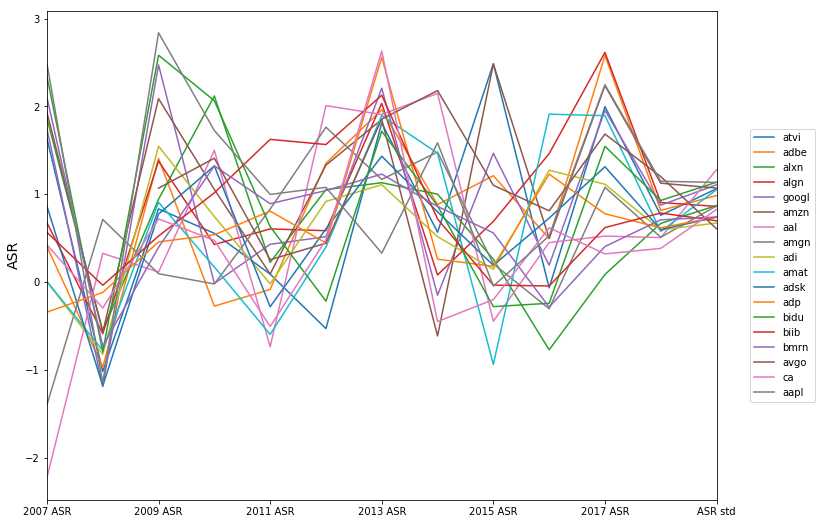

In [184]:
ASR_df2.plot(figsize=(12, 9))
plt.ylabel("ASR", size=14)
plt.legend(loc=(1.05, 0.2))
# ASR values have no obvious organized pattern. 

In [185]:
ASR_df2.reset_index()

stock name,index,atvi,adbe,alxn,algn,googl,amzn,aal,amgn,adi,amat,adsk,adp,bidu,biib,bmrn,avgo,ca,aapl
0,2007 ASR,1.634328,0.402982,1.862646,0.676492,1.744452,1.931313,-2.225736,-1.397471,0.003225,0.005898,0.865226,-0.342450,2.342741,0.566189,2.102039,NaN,0.423536,2.488159
1,2008 ASR,-1.017337,-0.968811,-0.558049,-0.587526,-1.188769,-0.568908,0.327130,0.712986,-0.822342,-0.775962,-1.181393,-0.118226,-0.793251,-0.036554,-0.731306,NaN,-0.295315,-1.146843
2,2009 ASR,0.833069,1.407640,0.942942,1.377513,2.472352,2.088409,0.113554,0.094886,1.546763,0.908484,0.774091,0.457201,2.582571,0.523876,0.395679,1.068910,0.719057,2.837835
3,2010 ASR,0.554684,-0.273990,2.118530,0.427480,-0.015363,1.054814,1.499903,-0.021614,0.745872,0.171585,1.322568,0.538199,2.064740,1.015731,1.322661,1.410153,0.474443,1.725531
4,2011 ASR,0.090241,-0.084359,0.224022,0.604891,0.429747,0.090925,-0.735971,0.830969,-0.020304,-0.596519,-0.280693,0.807284,0.631278,1.624464,0.892036,0.254495,-0.505589,0.998085
5,2012 ASR,-0.529974,1.352675,1.052366,0.584862,0.515984,1.331135,2.008532,1.763344,0.918384,0.399120,0.605221,0.446000,-0.217214,1.565915,1.041805,0.442489,0.480932,1.078387
6,2013 ASR,1.810848,1.961656,1.130717,2.035071,2.207065,1.851008,1.907990,1.168615,1.108035,1.895130,1.433261,2.558547,1.716704,2.127252,1.229087,1.855904,2.629101,0.329823
7,2014 ASR,0.567044,0.881611,1.000499,0.080780,-0.149497,-0.613416,2.148189,1.480437,0.516688,1.467578,0.799024,0.260889,0.868631,0.718204,0.861104,2.179938,-0.449605,1.585190
8,2015 ASR,2.486142,1.211101,0.259723,0.690949,1.466217,2.483548,-0.446497,0.207616,0.145485,-0.937125,0.191138,0.179400,-0.279499,-0.035049,0.559902,1.101854,-0.200077,-0.044655
9,2016 ASR,-0.066233,0.494417,-0.771512,1.462217,0.192093,0.497363,0.449356,-0.303220,1.273386,1.911394,0.728124,1.228114,-0.241646,-0.044304,-0.284773,0.811220,0.618854,0.525776


In [186]:
# Calculate Average ASR for the first 6 years. 
fir6year_ave = ASR_df2.iloc[0:6].mean(axis=0)

In [187]:
# Calculate Average ASR for the last 5 years.
last5year_ave = ASR_df2.iloc[6:11].mean(axis=0)

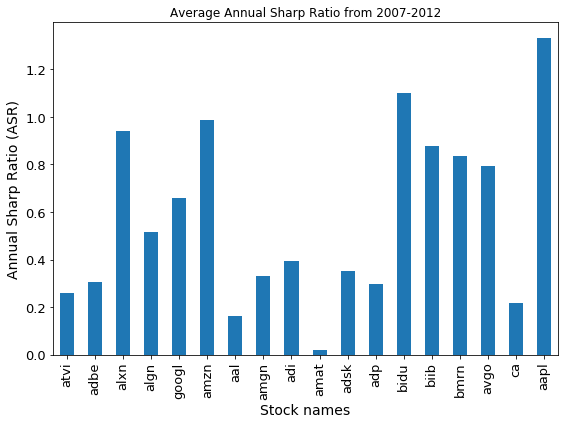

In [188]:
fir6year_ave.plot.bar(figsize=(8,6), fontsize=13)
plt.xlabel('Stock names', fontsize=14)
plt.ylabel('Annual Sharp Ratio (ASR)', fontsize=14)
plt.title('Average Annual Sharp Ratio from 2007-2012')
plt.tight_layout()

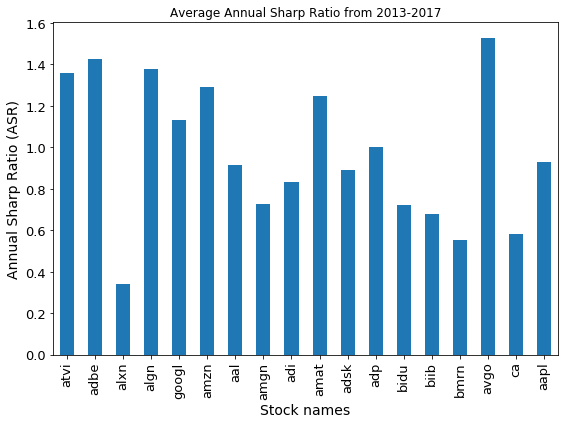

In [189]:
last5year_ave.plot.bar(figsize=(8,6), fontsize=13)
plt.xlabel('Stock names', fontsize=14)
plt.ylabel('Annual Sharp Ratio (ASR)', fontsize=14)
plt.title('Average Annual Sharp Ratio from 2013-2017')
plt.tight_layout()

Text(0,0.5,'Average ASR from 2013-2017')

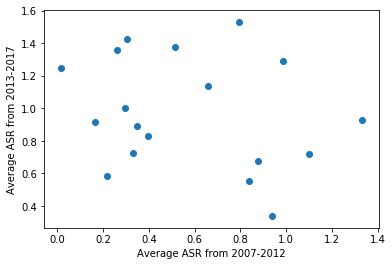

In [190]:
# data points aren't not following clear linear pattern
plt.scatter(x=fir6year_ave, y=last5year_ave)
plt.xlabel('Average ASR from 2007-2012')
plt.ylabel('Average ASR from 2013-2017')

In [191]:
# Sort first 6 year Average ASR in ascending order. 
fir6year_ave.sort_values()

stock name
amat     0.018768
aal      0.164569
ca       0.216177
atvi     0.260835
adp      0.298002
adbe     0.306023
amgn     0.330517
adsk     0.350837
adi      0.395266
algn     0.513952
googl    0.659734
avgo     0.794012
bmrn     0.837152
biib     0.876604
alxn     0.940409
amzn     0.987948
bidu     1.101811
aapl     1.330192
dtype: float64

In [192]:
sort_by_first6 = fir6year_ave.sort_values()

In [193]:
# Create a dataframe with the first 6 year average ASR sorted in order, and matching 2013-2017 average ASR 
sort_by_first6 = pd.concat([sort_by_first6,last5year_ave], axis=1, join='inner')

In [194]:
sort_by_first6.columns = ['2007-2012 ASR', '2013-2017 ASR']

In [195]:
sort_by_first6

,2007-2012 ASR,2013-2017 ASR
stock name,,
amat,0.018768,1.246260
aal,0.164569,0.916482
ca,0.216177,0.583818
atvi,0.260835,1.358922
adp,0.298002,1.000875
adbe,0.306023,1.425714
amgn,0.330517,0.726400
adsk,0.350837,0.892873
adi,0.395266,0.831424


In [196]:
sort_by_first6.iloc[0:9]['2007-2012 ASR']

stock name
amat    0.018768
aal     0.164569
ca      0.216177
atvi    0.260835
adp     0.298002
adbe    0.306023
amgn    0.330517
adsk    0.350837
adi     0.395266
Name: 2007-2012 ASR, dtype: float64

In [197]:
# Mean of the low ASR stock group based on the first 6 years average ASR. 
sort_by_first6.iloc[0:9]['2007-2012 ASR'].mean()

0.26011031568510873

In [198]:
# Mean of the high ASR stock group based on the first 6 years average ASR
sort_by_first6.iloc[9:18]['2007-2012 ASR'].mean()

0.8935349696122756

In [199]:
# Mean of 2013-2017 ASR in the low ASR group during 2007-2012.    
sort_by_first6.iloc[0:9]['2013-2017 ASR'].mean()

0.9980853978177531

In [200]:
# Mean of 2013-2017 ASR in the high ASR group during 2007-2012. 
sort_by_first6.iloc[9:18]['2013-2017 ASR'].mean()

0.950159259755197

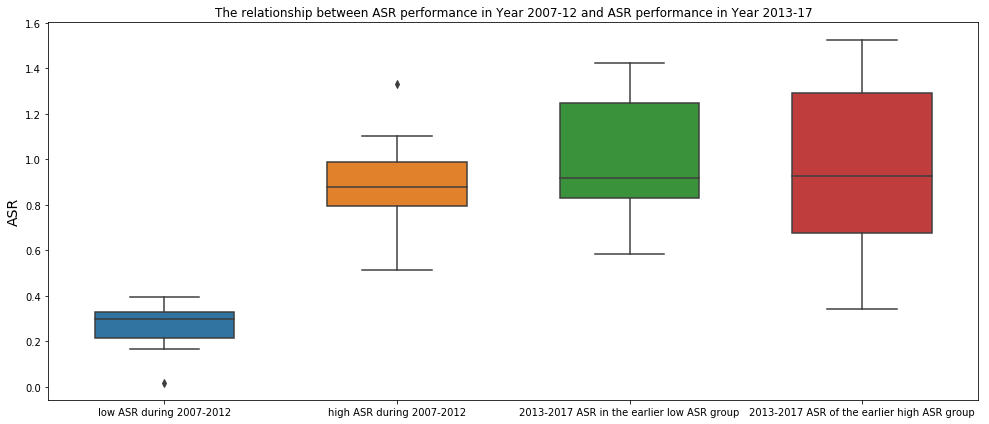

In [201]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.boxplot(data=[sort_by_first6.iloc[0:9]['2007-2012 ASR'],sort_by_first6.iloc[9:18]['2007-2012 ASR'], sort_by_first6.iloc[0:9]['2013-2017 ASR'], 
                   sort_by_first6.iloc[9:18]['2013-2017 ASR']], orient='v', width=0.6)
plt.xticks(range(4), ("low ASR during 2007-2012","high ASR during 2007-2012", "2013-2017 ASR in the earlier low ASR group", "2013-2017 ASR of the earlier high ASR group"))
plt.ylabel('ASR', fontsize=14)
plt.title('The relationship between ASR performance in Year 2007-12 and ASR performance in Year 2013-17')
plt.tight_layout()

#### ASR values of low performers (low ASR) and high performers (high ASR) are rather diffferent during 2007-2012. The difference between the 2 groups during 2013-2017 is very small, suggesting that selection of stocks based on the sharp ratio can't guarantee future stock outperformance in ASR.       

In [202]:
from scipy import stats

In [203]:
# T-test to determine the difference between 2 groups during 2007-12 is significant or not. 
stats.ttest_ind(sort_by_first6.iloc[0:9]['2007-2012 ASR'],sort_by_first6.iloc[9:18]['2007-2012 ASR'],equal_var=False ) 

Ttest_indResult(statistic=-7.1722453136937423, pvalue=1.4472509971453941e-05)

#### The difference between low ASR and high ASR groups in 2007-2012 is very significant statistically (p=1.44 X10^-5)

In [204]:
stats.ttest_ind(sort_by_first6.iloc[0:9]['2013-2017 ASR'],sort_by_first6.iloc[9:18]['2013-2017 ASR'], equal_var=False)

Ttest_indResult(statistic=0.28864811469820734, pvalue=0.77695447779847704)

#### The difference in average ASR between the two groups is not statistically significant (p=0.777) during 2013-2017. 